In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import warnings;
warnings.filterwarnings("ignore")

In [214]:
df1=pd.read_excel('vel_2018.xlsx')

In [215]:
df1.head()

,From Date,To Date,CO,Ozone,NO2,NO,NOx,SO2,RH,VWS,...,WD,BP,PM2.5,Temp,SR,Benzene,MP-Xylene,Toluene,O,Eth-Benzene
0,01-01-2018 00:00,01-01-2018 01:00,0,27.17,12.67,4.89,7.94,5.11,96.28,0.15,...,345.76,1008.15,70.05,None,0,1.66,0,5.23,2.19,NaN
1,01-01-2018 01:00,01-01-2018 02:00,0,29.96,12.65,4.89,7.93,5.38,96.11,0.15,...,344.63,1007.5,74.38,None,0,1.5,0,4.53,1.15,NaN
2,01-01-2018 02:00,01-01-2018 03:00,0,25.63,12.77,4.91,8.01,5.46,94.56,0.17,...,348.01,1007,76.47,None,0,1.54,0,4.36,0.48,NaN
3,01-01-2018 03:00,01-01-2018 04:00,0,32.77,12.44,4.84,7.75,4.04,90.09,0.17,...,350.67,1006.62,78.92,None,0,0.75,0,3.74,0,NaN
4,01-01-2018 04:00,01-01-2018 05:00,0,23.97,12.26,4.8,7.63,3.43,90.64,0.14,...,333.23,1006.6,56.75,None,0,0,0,3.14,0,NaN


In [216]:
df=df1[['From Date','BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']]

In [217]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2018 00:00,1008.15,0,0.15,345.76,1.02,4.89,12.67,70.05,96.28,5.11,0
1,01-01-2018 01:00,1007.5,0,0.15,344.63,0.93,4.89,12.65,74.38,96.11,5.38,0
2,01-01-2018 02:00,1007,0,0.17,348.01,1.13,4.91,12.77,76.47,94.56,5.46,0
3,01-01-2018 03:00,1006.62,0,0.17,350.67,1.17,4.84,12.44,78.92,90.09,4.04,0
4,01-01-2018 04:00,1006.6,0,0.14,333.23,0.88,4.8,12.26,56.75,90.64,3.43,0


In [218]:
df.shape

(8760, 12)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
From Date    8760 non-null object
BP           8760 non-null object
CO           8760 non-null object
VWS          8760 non-null object
WD           8760 non-null object
WS           8760 non-null object
NO           8760 non-null object
NO2          8760 non-null object
PM2.5        8760 non-null object
RH           8760 non-null object
SO2          8760 non-null object
SR           8760 non-null object
dtypes: object(12)
memory usage: 821.4+ KB


In [220]:
for i in df.columns:
    for j in df[i]:
        if(j=='None'):
            df[i]=df[i].replace(j,np.nan)

In [221]:
print("Percentage of Null values in Velachery 2018: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Velachery 2018:  0.9684170471841705


In [222]:
df.isna().sum()

From Date      0
BP            35
CO            87
VWS           34
WD            34
WS            34
NO           117
NO2          117
PM2.5         34
RH            81
SO2          108
SR           337
dtype: int64

In [223]:
list1=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
count=0
for i in list1:
    for j in df[i]:
        if(j<0):
            count=count+1

In [224]:
count/(len(df)*12)

0.00017123287671232877

In [225]:
for col in list1:
    if(col!='VWS'):
        for j in df[col]:
            if(j<0):
                df[col]=df[col].replace(j,np.nan)

In [226]:
print("Percentage of Null values in Velachery 2018: ",((df.isna().sum()/(len(df)*12)).sum())*100)

Percentage of Null values in Velachery 2018:  0.9845890410958905


In [227]:
df.isna().sum()

From Date      0
BP            35
CO            87
VWS           34
WD            34
WS            34
NO           117
NO2          117
PM2.5         51
RH            81
SO2          108
SR           337
dtype: int64

In [228]:
df=df.dropna(axis=0,subset=['PM2.5'])

In [229]:
m=['BP','CO','VWS','WD','WS','NO','NO2','PM2.5','RH','SO2','SR']
for col in m:
    df[col] = df[col].interpolate(method='nearest',limit_direction = 'both')

In [230]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

In [231]:
df['BP']=df['BP'].astype(float)
df['CO']=df['CO'].astype(float)
df['VWS']=df['VWS'].astype(float)
df['WD']=df['WD'].astype(float)
df['WS']=df['WS'].astype(float)
df['NO']=df['NO'].astype(float)
df['NO2']=df['NO2'].astype(float)
df['PM2.5']=df['PM2.5'].astype(float)
df['RH']=df['RH'].astype(float)
df['SO2']=df['SO2'].astype(float)
df['SR']=df['SR'].astype(float)

In [232]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
0,01-01-2018 00:00,1008.15,0.0,0.15,345.76,1.02,4.89,12.67,70.05,96.28,5.11,0.0
1,01-01-2018 01:00,1007.50,0.0,0.15,344.63,0.93,4.89,12.65,74.38,96.11,5.38,0.0
2,01-01-2018 02:00,1007.00,0.0,0.17,348.01,1.13,4.91,12.77,76.47,94.56,5.46,0.0
3,01-01-2018 03:00,1006.62,0.0,0.17,350.67,1.17,4.84,12.44,78.92,90.09,4.04,0.0
4,01-01-2018 04:00,1006.60,0.0,0.14,333.23,0.88,4.80,12.26,56.75,90.64,3.43,0.0


In [233]:
df.describe()

,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR
count,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000,8709.000000
mean,1006.378809,0.768582,0.196401,157.677366,1.483074,10.687147,18.339459,40.141233,59.094697,4.911101,195.638724
std,15.655681,0.511721,0.069959,91.996923,0.848072,10.428880,13.443051,22.746556,19.725944,3.217121,282.959884
min,503.250000,0.000000,-0.050000,1.300000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1002.900000,0.550000,0.140000,73.320000,0.820000,5.400000,12.110000,22.050000,43.880000,3.710000,0.450000
50%,1006.530000,0.700000,0.190000,166.320000,1.260000,9.330000,14.660000,36.520000,58.090000,4.580000,16.150000
75%,1010.000000,0.900000,0.240000,212.690000,1.960000,11.520000,19.940000,54.560000,73.130000,5.750000,355.330000
max,1046.330000,10.000000,0.490000,357.690000,5.040000,223.880000,202.220000,265.430000,99.900000,132.140000,997.050000


In [234]:
"""df['CO'] = np.where((df.CO >60),df['CO']/1000,df.CO)
df"""

"df['CO'] = np.where((df.CO >60),df['CO']/1000,df.CO)\ndf"

In [235]:
df.isna().sum()

From Date    0
BP           0
CO           0
VWS          0
WD           0
WS           0
NO           0
NO2          0
PM2.5        0
RH           0
SO2          0
SR           0
dtype: int64

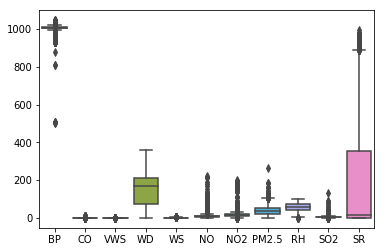

In [236]:
sns.boxplot(data=df)

In [237]:
df.shape

(8709, 12)

In [238]:
df['location']=1
df['location']=df['location'].astype('category')

In [239]:
df.head()

,From Date,BP,CO,VWS,WD,WS,NO,NO2,PM2.5,RH,SO2,SR,location
0,01-01-2018 00:00,1008.15,0.0,0.15,345.76,1.02,4.89,12.67,70.05,96.28,5.11,0.0,1
1,01-01-2018 01:00,1007.50,0.0,0.15,344.63,0.93,4.89,12.65,74.38,96.11,5.38,0.0,1
2,01-01-2018 02:00,1007.00,0.0,0.17,348.01,1.13,4.91,12.77,76.47,94.56,5.46,0.0,1
3,01-01-2018 03:00,1006.62,0.0,0.17,350.67,1.17,4.84,12.44,78.92,90.09,4.04,0.0,1
4,01-01-2018 04:00,1006.60,0.0,0.14,333.23,0.88,4.80,12.26,56.75,90.64,3.43,0.0,1


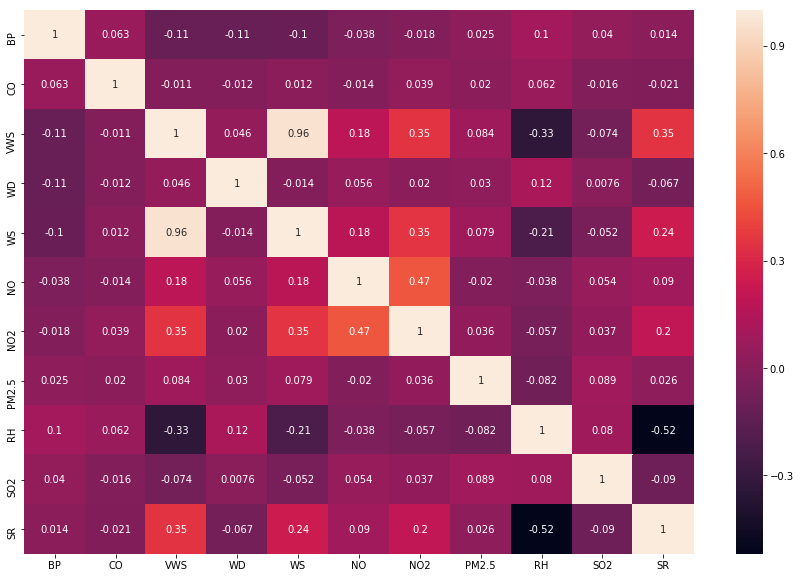

In [240]:
m=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(m,annot=True)

In [241]:
df.columns

Index(['From Date', 'BP', 'CO', 'VWS', 'WD', 'WS', 'NO', 'NO2', 'PM2.5', 'RH',
       'SO2', 'SR', 'location'],
      dtype='object')

In [242]:
"""iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)
up_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)
low_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)

iqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)
up_co=df['CO'].quantile(.75)+(1.5*iqr_co)
low_co=df['CO'].quantile(.25)-(1.5*iqr_co)

iqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)
up_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)
low_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)


iqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)
up_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)
low_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)


iqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)
up_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)
low_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)

iqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)
up_no=df['NO'].quantile(.75)+(1.5*iqr_no)
low_no=df['NO'].quantile(.25)-(1.5*iqr_no)

iqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)
up_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)
low_no2=df['NO2'].quantile(.25)-(1.5*iqr_no2)


iqr_pm=df['PM2.5'].quantile(.75)-df['PM2.5'].quantile(.25)
up_pm=df['PM2.5'].quantile(.75)+(1.5*iqr_pm)
low_pm=df['PM2.5'].quantile(.25)-(1.5*iqr_pm)

iqr_rh=df['RH'].quantile(.75)-df['RH'].quantile(.25)
up_rh=df['RH'].quantile(.75)+(1.5*iqr_rh)
low_rh=df['RH'].quantile(.25)-(1.5*iqr_rh)

iqr_so2=df['SO2'].quantile(.75)-df['SO2'].quantile(.25)
up_so2=df['SO2'].quantile(.75)+(1.5*iqr_so2)
low_so2=df['SO2'].quantile(.25)-(1.5*iqr_so2)

iqr_sr=df['SR'].quantile(.75)-df['SR'].quantile(.25)
up_sr=df['SR'].quantile(.75)+(1.5*iqr_sr)
low_sr=df['SR'].quantile(.25)-(1.5*iqr_sr)
"""

"iqr_bp=df['BP'].quantile(.75)-df['BP'].quantile(.25)\nup_bp=df['BP'].quantile(.75)+(1.5*iqr_bp)\nlow_bp=df['BP'].quantile(.25)-(1.5*iqr_bp)\n\niqr_co=df['CO'].quantile(.75)-df['CO'].quantile(.25)\nup_co=df['CO'].quantile(.75)+(1.5*iqr_co)\nlow_co=df['CO'].quantile(.25)-(1.5*iqr_co)\n\niqr_wd=df['WD'].quantile(.75)-df['WD'].quantile(.25)\nup_wd=df['WD'].quantile(.75)+(1.5*iqr_wd)\nlow_wd=df['WD'].quantile(.25)-(1.5*iqr_wd)\n\n\niqr_vws=df['VWS'].quantile(.75)-df['VWS'].quantile(.25)\nup_vws=df['VWS'].quantile(.75)+(1.5*iqr_vws)\nlow_vws=df['VWS'].quantile(.25)-(1.5*iqr_vws)\n\n\niqr_ws=df['WS'].quantile(.75)-df['WS'].quantile(.25)\nup_ws=df['WS'].quantile(.75)+(1.5*iqr_ws)\nlow_ws=df['WS'].quantile(.25)-(1.5*iqr_ws)\n\niqr_no=df['NO'].quantile(.75)-df['NO'].quantile(.25)\nup_no=df['NO'].quantile(.75)+(1.5*iqr_no)\nlow_no=df['NO'].quantile(.25)-(1.5*iqr_no)\n\niqr_no2=df['NO2'].quantile(.75)-df['NO2'].quantile(.25)\nup_no2=df['NO2'].quantile(.75)+(1.5*iqr_no2)\nlow_no2=df['NO2'].quantil

In [243]:
"""for i in df['CO']:
    if(i>up_co):
        df['CO']=df['CO'].replace(i,up_co)

for i in df['NO2']:
    if(i>up_no2):
        df['NO2']=df['NO2'].replace(i,up_no2)
for i in df['NO']:
    if(i>up_no):
        df['NO']=df['NO'].replace(i,up_no)

for i in df['SO2']:
    if(i>up_so2):
        df['SO2']=df['SO2'].replace(i,up_so2)
        
for i in df['RH']:
    if(i>up_rh):
        df['RH']=df['RH'].replace(i,up_rh)
        
for i in df['VWS']:
    if(i>up_vws):
        df['VWS']=df['VWS'].replace(i,up_vws)
        
for i in df['WS']:
    if(i>up_ws):
        df['WS']=df['WS'].replace(i,up_ws)
        
for i in df['WD']:
    if(i>up_wd):
        df['WD']=df['WD'].replace(i,up_wd)
        
for i in df['PM2.5']:
    if(i>up_pm):
        df['PM2.5']=df['PM2.5'].replace(i,up_pm)
        
for i in df['SR']:
    if(i>up_sr):
        df['SR']=df['SR'].replace(i,up_sr)

for i in df['BP']:
    if(i<low_bp):
        df['BP']=df['BP'].replace(i,low_bp)
    elif(i>up_bp):
        df['BP']=df['BP'].replace(i,up_bp)"""

"for i in df['CO']:\n    if(i>up_co):\n        df['CO']=df['CO'].replace(i,up_co)\n\nfor i in df['NO2']:\n    if(i>up_no2):\n        df['NO2']=df['NO2'].replace(i,up_no2)\nfor i in df['NO']:\n    if(i>up_no):\n        df['NO']=df['NO'].replace(i,up_no)\n\nfor i in df['SO2']:\n    if(i>up_so2):\n        df['SO2']=df['SO2'].replace(i,up_so2)\n        \nfor i in df['RH']:\n    if(i>up_rh):\n        df['RH']=df['RH'].replace(i,up_rh)\n        \nfor i in df['VWS']:\n    if(i>up_vws):\n        df['VWS']=df['VWS'].replace(i,up_vws)\n        \nfor i in df['WS']:\n    if(i>up_ws):\n        df['WS']=df['WS'].replace(i,up_ws)\n        \nfor i in df['WD']:\n    if(i>up_wd):\n        df['WD']=df['WD'].replace(i,up_wd)\n        \nfor i in df['PM2.5']:\n    if(i>up_pm):\n        df['PM2.5']=df['PM2.5'].replace(i,up_pm)\n        \nfor i in df['SR']:\n    if(i>up_sr):\n        df['SR']=df['SR'].replace(i,up_sr)\n\nfor i in df['BP']:\n    if(i<low_bp):\n        df['BP']=df['BP'].replace(i,low_bp)\n    e

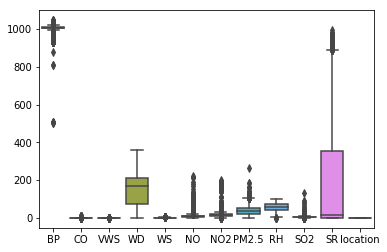

In [244]:
sns.boxplot(data=df)

In [245]:
result_csv1 = df.to_csv (r'C:\dse_new\eda_vel_18.csv', index = None, header=True)

# Upto this basic EDA is done